In [4]:
import tensorflow as tf 
from tensorflow.keras import models, layers 
import matplotlib.pyplot as plt 

In [5]:
IMAGE_SIZE = 256 
BATCH_SIZE =32 
CHANNELS=3 
EPOCHS=50

In [6]:
 
dataset = tf.keras.preprocessing.image_dataset_from_directory( 
    "PlantVillage", 
    shuffle =True, 
    image_size = (IMAGE_SIZE, IMAGE_SIZE), 
    batch_size = BATCH_SIZE 
) 

Found 2155 files belonging to 3 classes.


In [7]:
class_names = dataset.class_names 
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [8]:
 
for image_batch, labels_batch in dataset.take(1): 
    #print(image_batch[0].numpy()) 
    print(image_batch[0].shape)

(256, 256, 3)


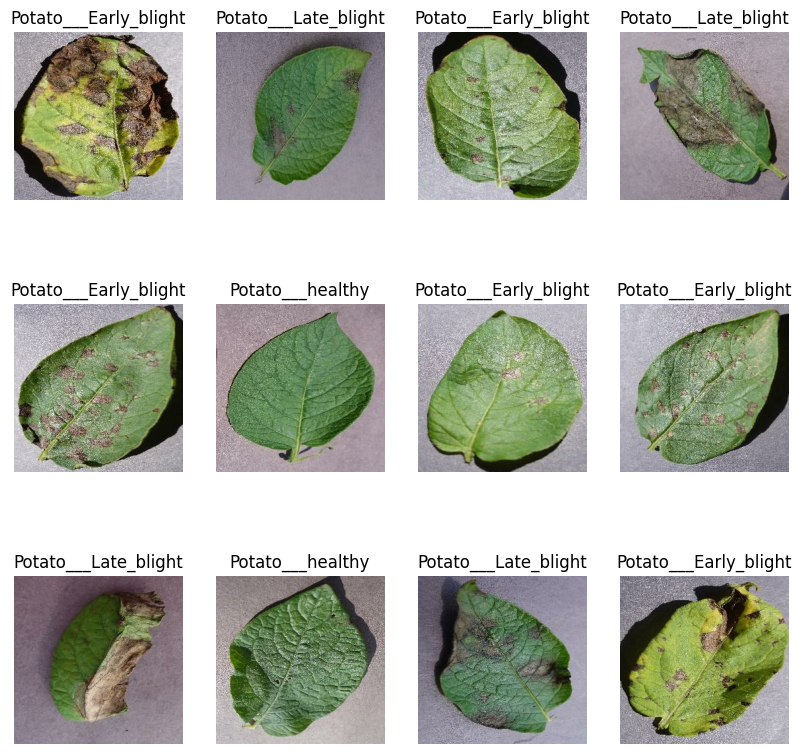

In [9]:
plt.figure(figsize=(10, 10)) 
for image_batch, labels_batch in dataset.take(1): 
    for i in range(12): 
        ax = plt.subplot(3, 4, i + 1) 
        plt.imshow(image_batch[i].numpy().astype("uint8")) 
        plt.title(class_names[labels_batch[i]]) 
        plt.axis("off")

In [10]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000): 
    #assert (train_split + test_split + val_split) == 1 
     
    ds_size = len(ds) 
     
    if shuffle: 
        ds = ds.shuffle(shuffle_size, seed=12) 
     
    train_size = int(train_split * ds_size) 
    val_size = int(val_split * ds_size) 
     
    train_ds = ds.take(train_size)     
    val_ds = ds.skip(train_size).take(val_size) 
    test_ds = ds.skip(train_size).skip(val_size) 
     
    return train_ds, val_ds, test_ds 

In [11]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [12]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE) 
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE) 
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [13]:
resize_and_rescale = tf.keras.Sequential([ 
    tf.keras.layers.Resizing(IMAGE_SIZE, IMAGE_SIZE), 
    tf.keras.layers.Rescaling(1.0/255), 
])

In [14]:
data_augmentation = tf.keras.Sequential([ 
    tf.keras.layers.RandomFlip("horizontal_and_vertical"), 
    tf.keras.layers.RandomRotation(0.2), 
]) 

In [16]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS) 
n_classes = 3 
 
model = models.Sequential([ 
    resize_and_rescale, 
    layers.Conv2D(32,(3,3), activation='relu', input_shape=input_shape), 
    layers.MaxPooling2D((2, 2)), 
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'), 
    layers.MaxPooling2D((2, 2)), 
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'), 
    layers.MaxPooling2D((2, 2)), 
    layers.Conv2D(64, (3, 3), activation='relu'), 
    layers.MaxPooling2D((2, 2)), 
    layers.Conv2D(64, (3, 3), activation='relu'), 
    layers.MaxPooling2D((2, 2)), 
    layers.Conv2D(64, (3, 3), activation='relu'), 
    layers.MaxPooling2D((2, 2)), 
    layers.Flatten(), 
    layers.Dense(64, activation='relu'), 
    layers.Dense(n_classes, activation='softmax'), 
]) 
model.build(input_shape=input_shape) 

In [17]:
model.summary() 

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (32, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (32, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (32, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (32, 4, 4, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (32, 2, 2, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (32, 256)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (32, 64)                    │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (32, 3)                     │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile( 
    optimizer='adam', 
    
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
    metrics=['accuracy'] 
) 
 
history = model.fit( 
    train_ds, 
    batch_size=BATCH_SIZE, 
    validation_data=val_ds, 
    verbose=1, 
    epochs=5, 
) 
 
scores = model.evaluate(test_ds)

Epoch 1/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 125s 2s/step - accuracy: 0.5116 - loss: 0.8948 - val_accuracy: 0.5938 - val_loss: 0.7636
Epoch 2/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 130s 2s/step - accuracy: 0.7546 - loss: 0.5744 - val_accuracy: 0.7917 - val_loss: 0.4408
Epoch 3/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.8814 - loss: 0.3093 - val_accuracy: 0.7656 - val_loss: 0.4488
Epoch 4/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 133s 2s/step - accuracy: 0.8987 - loss: 0.2431 - val_accuracy: 0.8958 - val_loss: 0.2560
Epoch 5/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 131s 2s/step - accuracy: 0.9253 - loss: 0.1941 - val_accuracy: 0.9115 - val_loss: 0.1753
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 624ms/step - accuracy: 0.9023 - loss: 0.2222


first image to predict
actual label: Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
predicted label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 983ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


FileNotFoundError: [WinError 3] The system cannot find the path specified: '../models'

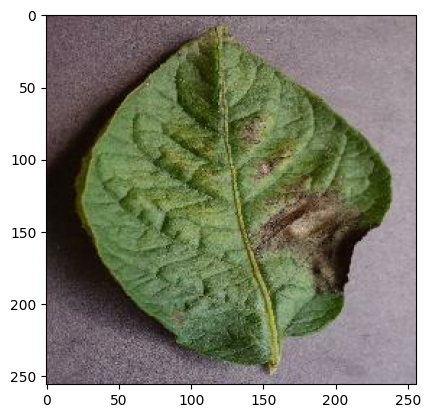

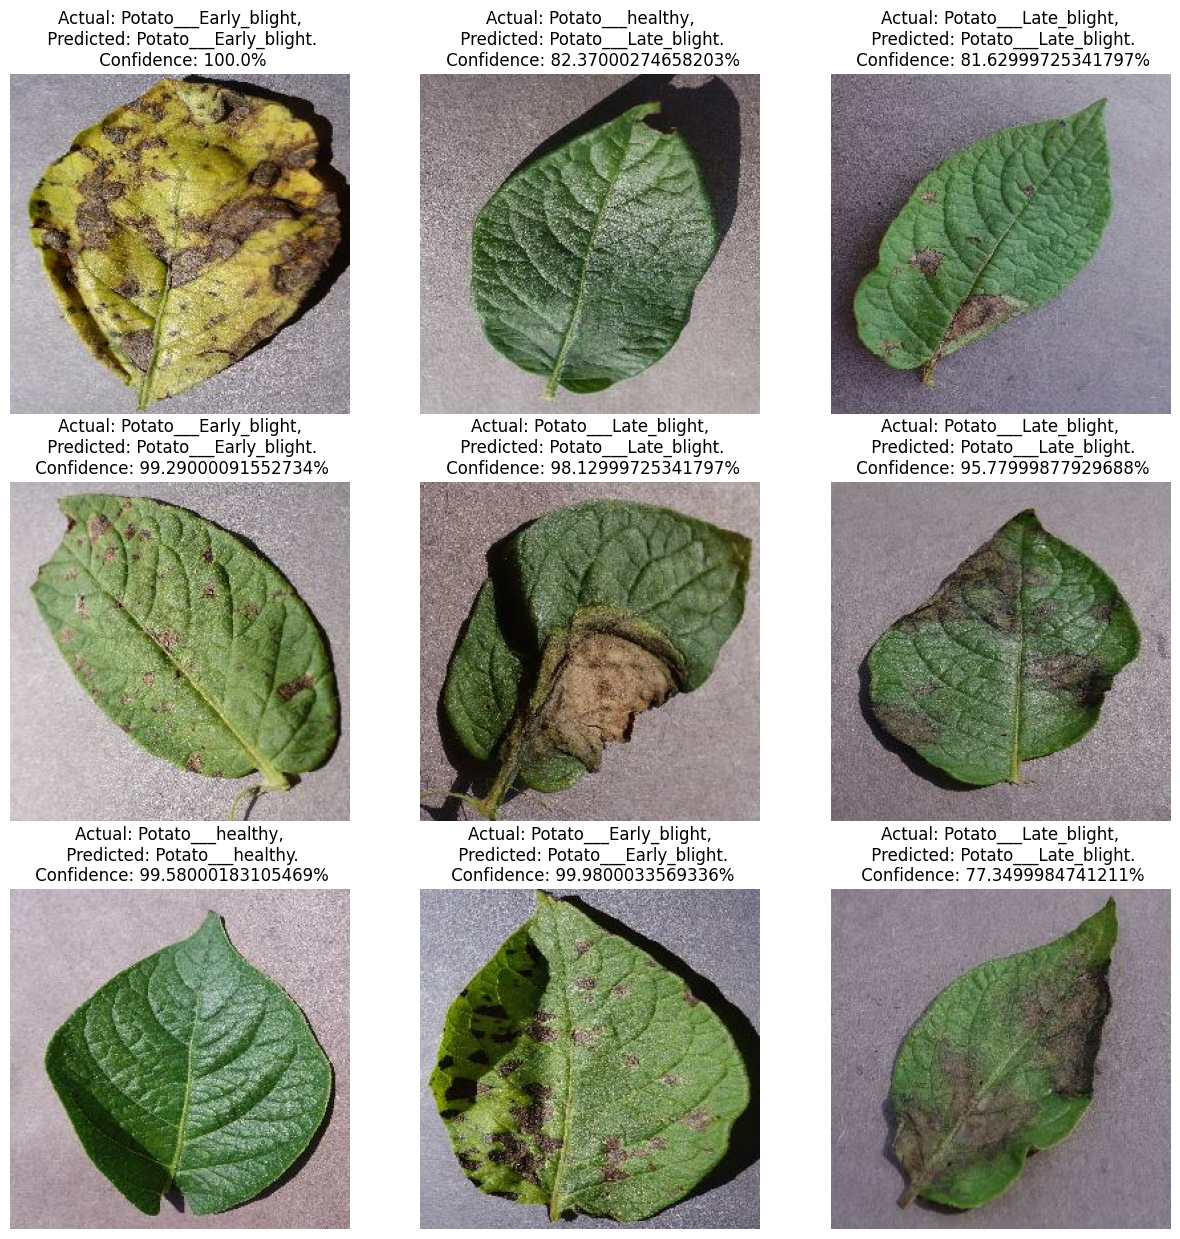

In [21]:
 
import numpy as np 
for images_batch, labels_batch in test_ds.take(1): 
    #print(images_batch[0]) 
    first_image = images_batch[0].numpy().astype('uint8') 
    first_label = labels_batch[0].numpy() 
     
    print("first image to predict") 
    plt.imshow(first_image) 
    print("actual label:",class_names[first_label]) 
     
    batch_prediction = model.predict(images_batch) 
    print("predicted label:",class_names[np.argmax(batch_prediction[0])]) 
 
 
def predict(model, img): 
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy()) 
    img_array = tf.expand_dims(img_array, 0) 
 
    predictions = model.predict(img_array) 
 
    predicted_class = class_names[np.argmax(predictions[0])] 
    confidence = round(100 * (np.max(predictions[0])), 2) 
    return predicted_class, confidence 
 
 
plt.figure(figsize=(15, 15)) 
for images, labels in test_ds.take(1): 
    for i in range(9): 
        ax = plt.subplot(3, 3, i + 1) 
        plt.imshow(images[i].numpy().astype("uint8")) 
         
        predicted_class, confidence = predict(model, images[i].numpy()) 
        actual_class = class_names[labels[i]]  
         
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%") 
         
        plt.axis("off") 
 
 
import os 
model_version=max([int(i) for i in os.listdir("../models") + [0]])+1 
model.save(f"../models/{model_version}") 
 
model.save("../potatoes.h5")